In [1]:
from rdkit import Chem
import sys
from pathlib import Path
SELFIES_coder_path = Path("../SELFIES_coder")
sys.path.append(SELFIES_coder_path.as_posix())
import SELFIES_coder as SELFIES_coder
import pandas as pd

In [2]:
smifile = "../Data/caffeine_initials.xlsx"
data = pd.read_excel(smifile)
#data = data['SMILES']

In [3]:
data['SELFIES'] = [SELFIES_coder.SMILES_to_SELFIES(smi) for smi in data['SMILES']]
length_selfies = []
try:
    for SELFIE_ in data['SELFIES']:
        length_selfies.append(SELFIE_.count('['))
except:
    print('Something went wrong, check source code...')
data['SELFIES_length'] = length_selfies

<AxesSubplot: >

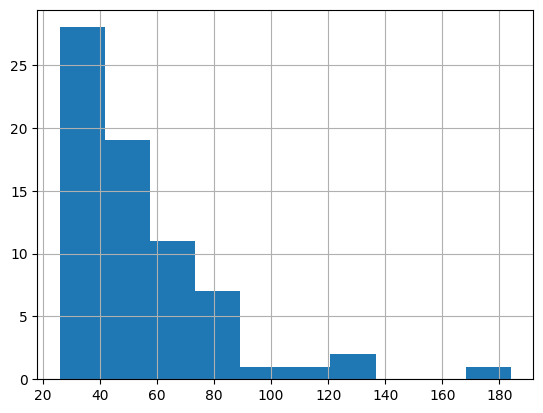

In [4]:
data['SELFIES_length'].hist()

In [5]:
data['SELFIES_length'].max()

184

In [6]:
data['SELFIES_length'].min()

26

In [7]:
len(data[data['SELFIES_length'] > 160])

1

In [8]:
len(data[data['SELFIES_length'] > 90])

5

In [9]:
len(data[data['SELFIES_length'] > 80])

11

In [10]:
mols = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

In [11]:
smiles_generic = [Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True) for mol in mols]

In [12]:
len(smiles_generic[62]) #the longest element

175

In [13]:
data['generic_smiles'] = smiles_generic

In [14]:
data['SELFIES_generic'] = [SELFIES_coder.SMILES_to_SELFIES(smi) for smi in data['generic_smiles']]
length_selfies = []
try:
    for SELFIE_ in data['SELFIES_generic']:
        length_selfies.append(SELFIE_.count('['))
except:
    print('Something went wrong, check source code...')
data['SELFIES_length_generic'] = length_selfies

<AxesSubplot: >

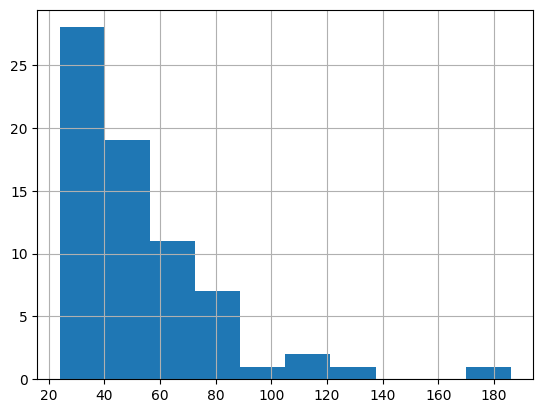

In [15]:
data['SELFIES_length_generic'].hist()

In [16]:
len(data[data['SELFIES_length'] < 80]) # maybe these should be our initial structures

58

In [17]:
data = data[data['SELFIES_length'] < 80]

In [18]:
data.head()

,SMILES,Aktywność cytoprotekcyjna (%) - initial,Aktywność cytoprotekcyjna (%),SELFIES,SELFIES_length,generic_smiles,SELFIES_generic,SELFIES_length_generic
0,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=O,12,12,[C][N][Branch1][#Branch1][C][Branch1][Ring1][N...,26,Cn1c(=O)c2c(ncn2C)n(C)c1=O,[C][N][C][=Branch1][C][=O][C][=C][Branch1][#Br...,24
1,CN(C(N1C)=S)C2=C(N(C)C=N2)C1=S,45,45,[C][N][Branch1][#Branch1][C][Branch1][Ring1][N...,26,Cn1c(=S)c2c(ncn2C)n(C)c1=S,[C][N][C][=Branch1][C][=S][C][=C][Branch1][#Br...,24
2,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=S,65,65,[C][N][Branch1][#Branch1][C][Branch1][Ring1][N...,26,Cn1c(=S)c2c(ncn2C)n(C)c1=O,[C][N][C][=Branch1][C][=S][C][=C][Branch1][#Br...,24
3,CN(C(N1C)=O)C2=C(N(C)C(SC)=N2)C1=O,15,15,[C][N][Branch1][#Branch1][C][Branch1][Ring1][N...,30,CSc1nc2c(c(=O)n(C)c(=O)n2C)n1C,[C][S][C][=N][C][=C][Branch1][P][C][=Branch1][...,28
4,CN(C(N1C)=O)C2=C(N(C)C(SCC)=N2)C1=O,10,10,[C][N][Branch1][#Branch1][C][Branch1][Ring1][N...,31,CCSc1nc2c(c(=O)n(C)c(=O)n2C)n1C,[C][C][S][C][=N][C][=C][Branch1][P][C][=Branch...,29


## Training_data_from_initials, maybe scaling will be more worth it

In [19]:
data.iloc[7]

SMILES                                            CN(C(N1C)=O)C2=C(N(C)C(SCC(C)(C)C)=N2)C1=O
Aktywność cytoprotekcyjna (%) - initial                                                    0
Aktywność cytoprotekcyjna (%)                                                              0
SELFIES                                    [C][N][Branch1][#Branch1][C][Branch1][Ring1][N...
SELFIES_length                                                                            39
generic_smiles                                        Cn1c(=O)c2c(nc(SCC(C)(C)C)n2C)n(C)c1=O
SELFIES_generic                            [C][N][C][=Branch1][C][=O][C][=C][Branch2][Rin...
SELFIES_length_generic                                                                    38
Name: 7, dtype: object

In [20]:
mols = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

In [21]:
smiles_training = []

for i in range(10000):
    for smi in mols:
        try:
            new_smi = Chem.MolToSmiles(smi, doRandom=True)
            smiles_training.append(new_smi)
        except:
            print("Error when processing", i, smi)
drop_duplicates_smi_train = list(set(smiles_training))
len(drop_duplicates_smi_train)

336206

## convert to SELFIES and check if there are repetitions

In [22]:
selfies_training = [SELFIES_coder.SMILES_to_SELFIES(smi) for smi in smiles_training]
drop_duplicates_self_train = list(set(selfies_training))
len(drop_duplicates_self_train)

328851

In [23]:
to_be_tested = pd.DataFrame(data=drop_duplicates_self_train, columns=['SELFIES'])

In [24]:
to_be_tested__ = [SELFIES_coder.SELFIES_to_SMILES(self) for self in drop_duplicates_self_train]
drop_duplicates_smmi_train = list(set(to_be_tested__))
len(drop_duplicates_smmi_train)

328851

In [25]:
training_smiles = pd.DataFrame(data=drop_duplicates_smmi_train, columns=['SMILES'])

In [26]:
training_smiles.to_parquet('../Data/training_data_smiles_caffeine.parquet')

In [27]:
to_be_saved = data[['SMILES', 'Aktywność cytoprotekcyjna [%]']]
to_be_saved.to_excel('../Data/initial_caffeine.xlsx')